주차별 평균으로 discontinuity 확인

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [3]:
input_year_list = [ '2023', '2024']
year_range = '2324'

In [4]:
input_pl = 'python'

In [5]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}_{year_range}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [6]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2022-11-30
2024-12-01


In [7]:
complexity_python_df

,id,cdate,title,body
0,75068491,2023-01-10,Spyne/Python/Soap. Add xsi:type to AnyDict,<p>Im using Spyne &amp; I try to add xsi:type=...
1,75068517,2023-01-10,pyTorch nn.Conv2D use twice lead to an error,<p>I am using pytorch training a model. Here i...
2,75068523,2023-01-10,I can't put function result on a window on Tki...,<p>So right now i am making a news API and I w...
3,75068535,2023-01-10,Correct typing for numpy array with Drake expr...,<p>I making a numpy array of Drake expressions...
4,75068551,2023-01-10,Pytest showing error if path to test is not sp...,<p>I have a conftest.py inside my tests/ folde...
...,...,...,...,...
58754,79242541,2024-12-01,"In Polars, how do you create a group counter /...",<p>How do you get a <code>group_id</code> colu...
58755,79242582,2024-12-01,ModuleNotFoundError: No module named 'box.exce...,<pre><code>from box.exceptions import BoxValue...
58756,79242610,2024-12-01,Implementing sklearn.ensemble.GradientBoosting...,<p>I'm trying to create models that support mu...
58757,79242639,2024-12-01,Google DV360 Reporting - Error while fetching ...,<p>I am trying to extract and download reports...


In [8]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}_{year_range}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [9]:
calc_com_df.reset_index(drop=True, inplace=True)

In [10]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,116164_76095813.py,116164_76095813.py,0
1,179707_75112672.py,179707_75112672.py,0
2,42002_77392671.py,42002_77392671.py,1
3,79238_76723128.py,79238_76723128.py,0
4,79588_76710114.py,79588_76710114.py,0


In [11]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [12]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [13]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
99235,1_79280452.py,1_79280452.py,1,1,79280452
10084,10_75068551.py,10_75068551.py,0,10,75068551
127782,10_79234157.py,10_79234157.py,0,10,79234157
136116,100_79235663.py,100_79235663.py,1,100,79235663
73052,1000_75052191.py,1000_75052191.py,0,1000,75052191
...,...,...,...,...,...
16020,99995_76385310.py,99995_76385310.py,0,99995,76385310
6746,99996_76385310.py,99996_76385310.py,0,99996,76385310
72977,99997_76385323.py,99997_76385323.py,0,99997,76385323
56941,99998_76385323.py,99998_76385323.py,0,99998,76385323


In [14]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [15]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136563 entries, 0 to 136562
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  136563 non-null  object
 1   File Name             136563 non-null  object
 2   Cognitive Complexity  136563 non-null  int64 
 3   idx                   136563 non-null  int64 
 4   id                    136563 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.2+ MB


In [16]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [17]:
calc_com_df.head()

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75068491,2023-01-10,2_75068491.py,2_75068491.py,1,2
1,75068491,2023-01-10,3_75068491.py,3_75068491.py,0,3
2,75068517,2023-01-10,5_75068517.py,5_75068517.py,0,5
3,75068517,2023-01-10,6_75068517.py,6_75068517.py,0,6
4,75068551,2023-01-10,10_75068551.py,10_75068551.py,0,10


In [18]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [19]:
# calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [20]:
calc_ed_com_df

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75068491,2023-01-10,2_75068491.py,2_75068491.py,1,2
1,75068491,2023-01-10,3_75068491.py,3_75068491.py,0,3
2,75068517,2023-01-10,5_75068517.py,5_75068517.py,0,5
3,75068517,2023-01-10,6_75068517.py,6_75068517.py,0,6
4,75068551,2023-01-10,10_75068551.py,10_75068551.py,0,10
...,...,...,...,...,...,...
136558,79242440,2024-12-01,86314_79242440.py,86314_79242440.py,0,86314
136559,79242472,2024-12-01,86317_79242472.py,86317_79242472.py,10,86317
136560,79242582,2024-12-01,86319_79242582.py,86319_79242582.py,0,86319
136561,79242639,2024-12-01,86320_79242639.py,86320_79242639.py,0,86320


In [21]:
calc_ed_com_df

,id,cdate,Path,File Name,Cognitive Complexity,idx
0,75068491,2023-01-10,2_75068491.py,2_75068491.py,1,2
1,75068491,2023-01-10,3_75068491.py,3_75068491.py,0,3
2,75068517,2023-01-10,5_75068517.py,5_75068517.py,0,5
3,75068517,2023-01-10,6_75068517.py,6_75068517.py,0,6
4,75068551,2023-01-10,10_75068551.py,10_75068551.py,0,10
...,...,...,...,...,...,...
136558,79242440,2024-12-01,86314_79242440.py,86314_79242440.py,0,86314
136559,79242472,2024-12-01,86317_79242472.py,86317_79242472.py,10,86317
136560,79242582,2024-12-01,86319_79242582.py,86319_79242582.py,0,86319
136561,79242639,2024-12-01,86320_79242639.py,86320_79242639.py,0,86320


In [22]:
calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2023,12,1)).dt.days/7)


In [23]:
calc_ed_com_df[(calc_ed_com_df['rel_week']>=-52)&(calc_ed_com_df['rel_week']<52)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 135290 entries, 0 to 136544
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    135290 non-null  int64  
 1   cdate                 135290 non-null  object 
 2   Path                  135290 non-null  object 
 3   File Name             135290 non-null  object 
 4   Cognitive Complexity  135290 non-null  int64  
 5   idx                   135290 non-null  int64  
 6   rel_week              135290 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 8.3+ MB


In [24]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['rel_week']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [25]:
calc_ed_com_mean_df.head()

,rel_week,id,Cognitive Complexity,idx
0,-53.0,7.463577e+07,0.960854,30681.401246
1,-52.0,7.469358e+07,1.164216,26386.326287
2,-51.0,7.477763e+07,1.023021,20803.624724
3,-50.0,7.485575e+07,0.946623,14781.230211
4,-49.0,7.492684e+07,1.006454,9811.382530


In [26]:
chow_df = calc_ed_com_mean_df[['rel_week', 'Cognitive Complexity']]

In [27]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/calc_ed_com_mean_df_{input_pl}_{year_range}.pkl', 'wb') as f:
    pickle.dump(calc_ed_com_mean_df, f)


In [28]:
chow_df = chow_df[(chow_df['rel_week']>=-52)&(chow_df['rel_week']<52)]

In [29]:
x = chow_df['rel_week'].values

In [30]:
np.argmax(np.where(x <= 0)) 

52

In [31]:
chow_df_1year = chow_df[chow_df['rel_week']>=-52]
st_chow_1year = st.Stats(chow_df_1year['rel_week'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


In [32]:
np.argmax(np.where(x < 0))

51

In [33]:
x[:51]

array([-52., -51., -50., -49., -48., -47., -46., -45., -44., -43., -42.,
       -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.])

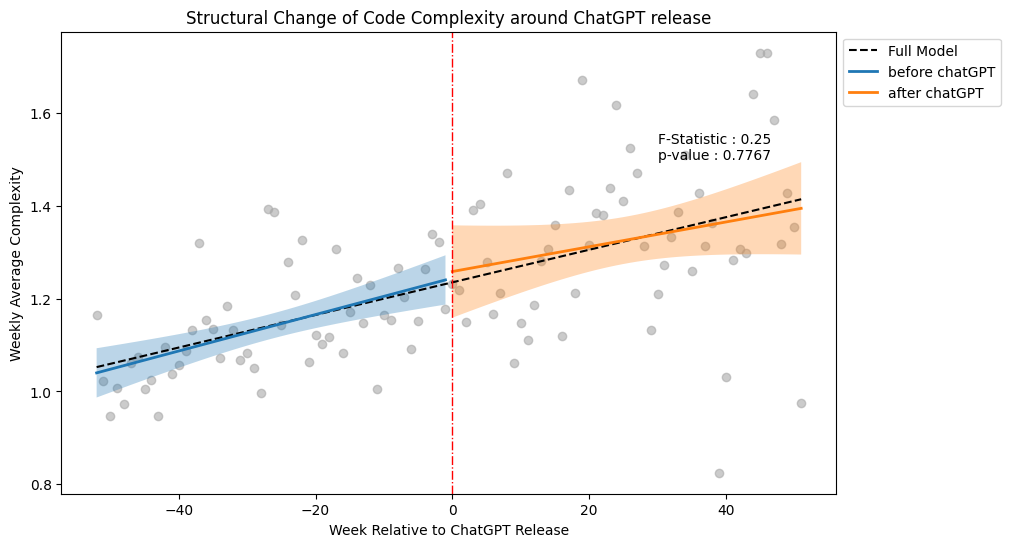

In [34]:
x = chow_df_1year['rel_week'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x < 0))+1
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_1year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_1year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_1year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.3)

plt.text(30, 1.5, s=f'F-Statistic : {F_stat_1:.2f}\np-value : {p_value_1:.4f}', fontsize = 10) #
plt.axvline(x=0,     color='red',    linestyle='-.', linewidth=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left')
plt.title(f"Structural Change of Code Complexity around ChatGPT release")
plt.xlabel("Week Relative to ChatGPT Release")
plt.ylabel("Weekly Average Complexity")
plt.savefig("complexity_chow_ver3.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화
plt.show()


In [35]:
plt.savefig("complexity_chow_ver3.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화

<Figure size 640x480 with 0 Axes>